# Taller 6
<p>Implementar en Notebook Jupyter una red de colas de un Centro de Diagnóstico Automotriz que emiten la revisión técnico-mecánica</p>


In [6]:
#Declaración de funciones a usar
import matplotlib.pyplot as plt
from math import exp
from math import sqrt
from math import pi
from math import log
from math import fabs
import random
import math


def congruencial():
    a = 22695477
    b = 7
    m = 2**32
    x0 = random.randint(123456, 987654)
    xi = (a*x0+b)%m
    return (xi/m)

def exponencial(l):
    U = congruencial()
    x = -(log(1-U)/float(l))
    return x

def normal(): 
    x = sqrt(-2*math.log1p(congruencial()-1))*math.sin(2*math.pi*congruencial())
    if x < 0:
        x = 0
    return (x)

def uniforme(a, b):
    v = congruencial()
    x = (b-a)*v + a
    return x



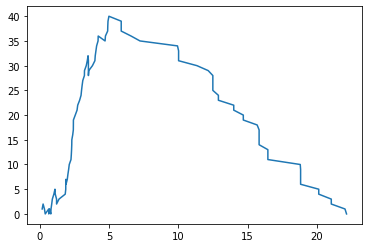

Tiempo promedio del sistema   523.5077870411421
Numero promedio de clientes en el servidor 1:  0.09064408256501758
Numero promedio de clientes en el servidor 2:  0.09064408256501758
Numero promedio de clientes en el servidor 3:  0.3880971277536024


In [9]:
def llegada_cliente(tsuc):
    global n_med_n1, n1, t, NLL1, LL1
    n_med_n1 = n_med_n1 + n1*(tsuc-t)
    n1 = n1 + 1
    NLL1 = NLL1 + 1
    LL1.append(tsuc)
    t = tsuc
    clientes.append(n1)
    tiempo.append(t)
    Y = exponencial(10)
    if ((t + Y) < T):
        TSuc['tLL1'] = t + Y
    if (n1 == 1):
        Y = normal()
        TSuc['tS1'] = t + Y
        
def servicio_nodo1(tsuc):
    global n_med_n1, n1, t, NS1, n_med_n2, n2, NLL2, LL2,n_med_n3, n3, NLL3,LL3
    n_med_n1 = n_med_n1 + n1*(tsuc-t)
    n1 = n1 - 1 
    NS1 = NS1 + 1
    S1.append(tsuc)
    
    U = uniforme(0,1)
    
    if (U <= 0.4):
        n_med_n2 = n_med_n2 + n2*(tsuc-t)
        n2 = n2 + 1
        NLL2 = NLL2 + 1
        LL2.append(tsuc)
        if (n2 == 1):
            Z = exponencial(12)
            TSuc['tS2'] = tsuc + Z
    else:
        n_med_n3 = n_med_n3 + n3*(tsuc-t)
        n = n3 + 1
        NLL3 = NLL3 + 1
        LL3.append(tsuc)
        if (n3 == 1):
            W = normal()
            TSuc['tS3'] = tsuc + W
    t = tsuc
    clientes.append(n1)
    tiempo.append(t)
    if (n1 > 0):
        S = normal()
        TSuc['tS1'] = t + S

def servicio_nodo2(tsuc):
    global n_med_n2, t, n2, NS2, S2, n_med_n3, n3,NLL3, LL3
    n_med_n2 = n_med_n2 + n2*(tsuc-t)
    n2 = n2 - 1
    NS2 = NS2 + 1
    S2.append(tsuc)
    
    if (n2 >0):
        Y = exponencial(12)
        TSuc['tS2'] = tsuc + Y
    
    n_med_n3 = n_med_n3 + n3*(tsuc-t)        
    n3 = n3 + 1
    NLL3 = NLL3 + 1
    LL3.append(tsuc)
    if (n3 == 1):
        W = normal()
        TSuc['tS3'] = tsuc + W 
    t = tsuc
    
def servicio_nodo3(tsuc):
    global n_med_n3, n3, NS3, S3, t
    n_med_n3 = n_med_n3 + n3*(tsuc-t)
    n3 = n3 - 1
    NS3 = NS3 + 1
    S3.append(tsuc)
    if (n3 > 0):
        if (n3 < 5):
            R = normal()
        else:
            R = normal()
        TSuc['tS3'] = tsuc + R
    t = tsuc

g_n_med_n1 = []
g_n_med_n2 = []
g_n_med_n3 = []
g_t_med_sistema = []
clientes = []
tiempo = []
t = tsuc = Tp = 0
M = 9999999
T = 5
TSuc = {'tLL1':M, 'tS1':M, 'tS2':M, 'tS3':M} 
NLL1 = NLL2 = NLL3 = 0
NS1 = NS2 = NS3 = 0
n1 = n2 = n3 = 0
LL1 = LL2 = LL3 = [0]
S1 = S2 = S3 = [0]
n_med_n1 = n_med_n2 = n_med_n3 = 0

X = exponencial(10)

if (X>T):
    Tp = t_medio_sistema = 0
    n_med_n1 = n_med_n2 = n_med_n3 = 0
else: 
    llegada_cliente(X)
    while (TSuc['tLL1'] != M or TSuc['tS1'] != M or TSuc['tS2'] != M or TSuc['tS3'] != M):
        if (min(TSuc.values()) == TSuc['tLL1']):
            tsuc = TSuc['tLL1']
            TSuc['tLL1'] = M
            llegada_cliente(tsuc)
        if (min(TSuc.values()) == TSuc['tS1']):
            tsuc = TSuc['tS1']
            TSuc['tS1'] = M
            servicio_nodo1(tsuc)
        if (min(TSuc.values()) == TSuc['tS2']):
            tsuc = TSuc['tS2']
            TSuc['tS2'] = M
            servicio_nodo2(tsuc)
        if (min(TSuc.values()) == TSuc['tS3']):
            tsuc = TSuc['tS3']
            TSuc['tS3'] = M
            servicio_nodo3(tsuc)

    Tp = max(0, t - T)

    global acumulo1, acumulo2, acumulo3
    acumulo1 = acumulo2 = acumulo3 = 0
    
    ind = 0
    while ind < NLL1:
        acumulo1 = acumulo1 + S1[ind] - LL1[ind]
        ind = ind + 1
    
    ind = 0
    while ind < NLL2:
        acumulo2 = acumulo2 + S2[ind] - LL2[ind]
        ind = ind + 1
    
    ind = 0
    while ind < NLL3:
        acumulo3 = acumulo3 + S3[ind] - LL3[ind]
        ind = ind + 1  
    
    g_t_med_sistema.append(acumulo1 + acumulo2 + acumulo3)
    g_n_med_n1.append(n_med_n2 / t)
    g_n_med_n2.append(n_med_n2 / t)
    g_n_med_n3.append(n_med_n3 / t)
    
    plt.plot(tiempo, clientes)
    plt.show()
    
print ("Tiempo promedio del sistema  ",sum(g_t_med_sistema)/len(g_t_med_sistema))
print ("Numero promedio de clientes en el servidor 1: ",sum(g_n_med_n1)/len(g_n_med_n1))
print ("Numero promedio de clientes en el servidor 2: ",sum(g_n_med_n2)/len(g_n_med_n2))
print ("Numero promedio de clientes en el servidor 3: ",sum(g_n_med_n3)/len(g_n_med_n3))